In [3]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
% matplotlib inline

We begin by computing an analytic approximation to the probability of error in a given bit of a given memory, when each memory is independent and the bits of each memory are independently sampled from a uniform Bernoulli distribution. 

We say that an 'error' occurs at bit $k$ in memory $m$ if, when the network is initialized with memory $m$ (that is $r_j(t)=r_j^{(m)} \forall j$), updating neuron $k$ would cause it to change its state (that is, $r_k(t+1)\neq r_k^{(m)}$). 

We use a Gaussian approximation to the input, so that $(H_k|r_k=1) \sim N\left(\frac{N-1}{8}, \frac{(N-1)(M-1)}{32}\right)$.

The probability of error in bit $k$ in memory $m$ is $\frac{1}{2}[P(H_k < 0 | r_k=1)+P(H_k > 0 | r_k=0)] = P(H_k < 0 | r_k=1) =\int_{-\infty}^0 \mathscr{N}\left(u; \frac{N-1}{8}, \frac{(N-1)(M-1)}{32}\right)du$  

To compute this, we used the `scipy` Python library, using the exact command: `scipy.stats.norm.cdf(0, loc=(N-1)/8, scale=np.sqrt((M-1)*(N-1)/32)`. 

Graphs of error probability against number of stored memories for $N=100$ and $N=1000$ are given below.

In [4]:
def log_bad_bit_prob(N,  M):
    # Gives the average error probability over randomness in chosen index and in patterns stored.
    # this IS NOT the same as prob of at least 1 error in any pattern over randomness in patterns stored.
    # it IS the same as error prob of at least 1 error in a chosen pattern over randomness in patterns stored.
    mean = (N-1.)/8.
    std = np.sqrt((M-1.)*(N-1.) / 32.)
     
    return norm.cdf(0, loc=mean, scale = std)

/home/peter/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1735: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


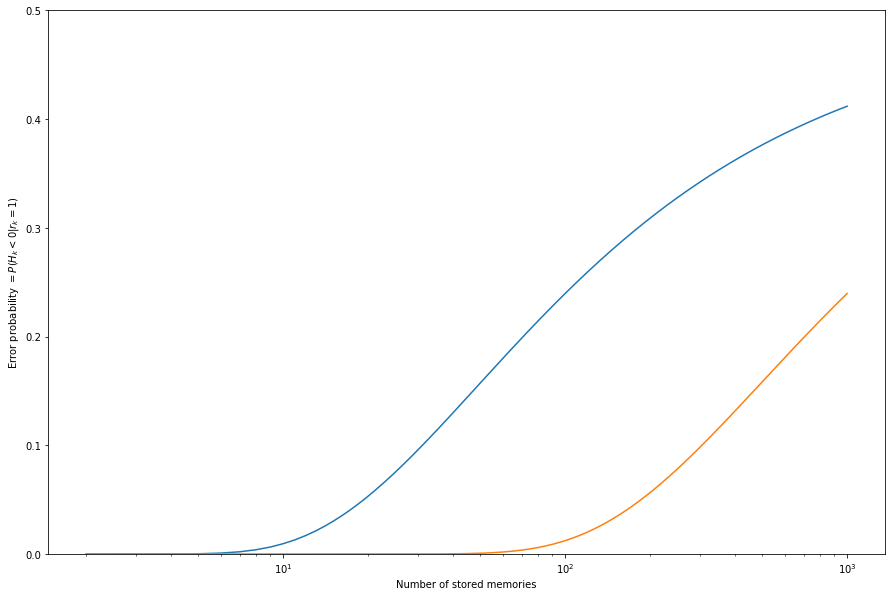

In [5]:
plt.rcParams['figure.figsize'] = [15, 10] # changes the default size [w, h]

Ms = np.arange(1, 1000, 1)
plt.plot(Ms, log_bad_bit_prob(100, Ms))
plt.plot(Ms, log_bad_bit_prob(1000, Ms))
plt.ylim(0,0.5)
plt.xscale('log')
plt.xlabel("Number of stored memories")
plt.ylabel("Error probability $=P(H_k<0|r_k=1)$")

(e) We then simulated a Hopfield network of $N=100$ neurons.

For $M= 1, 2, ..., 100, 200, 500, 1000$ we sampled $M$ random memories and stored them by setting the weights $W$ such that $W = \sum_{m=1}^M \left(\boldsymbol{r}^{(m)}-\frac{1}{2}\right) \left(\boldsymbol{r}^{(m)}-\frac{1}{2}\right)^T$.

After storing the memories, we determined for each bit in each memory whether it would change state when updated on its own. 

The matrix $X'$ of such updated states was found efficiently as $X'=H(WX)$, where $X$ is the $N\times M$ matrix of memories and $H(\cdot)$ is the Heaviside step function applied elementwise.

The number of bits in error across all memories was then calculated as the number of coefficients that differed between $X$ and $X'$.
To reduce the variance of these counts, for each $M$ we repeated this process $\lceil1000/M\rceil$ times and averaged them.

Below we plot the fraction of bits in error against the number of stored memories, together with the theoretical error probability curve from Exercise 1.

The simulation agrees closely with the theoretical curve.

In [6]:
def get_W(memories):
    M,N = memories.shape
    outer_prods = np.zeros([N, N, M])
    for m in range(M):
        outer_prods[:,:,m] =np.outer(memories[m,:]-0.5, memories[m,:]-0.5)
    W = np.sum(outer_prods, 2) * (1-np.identity(N))
    return W

In [7]:
M=4
N=100
memories = np.random.binomial(1, 0.5, (M, N))
W=get_W(memories)

In [8]:
get_W(memories)

array([[ 0. , -0.5, -0.5, ...,  0.5, -0.5,  0.5],
       [-0.5,  0. ,  1. , ..., -1. ,  0. ,  0. ],
       [-0.5,  1. ,  0. , ..., -1. ,  0. ,  0. ],
       ..., 
       [ 0.5, -1. , -1. , ...,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [9]:
N=100
p_errs = []
Ms = list(range(1, 100)) + [200, 500, 1000]
for M in Ms:
    p_errs_given_M = []
    for repeat in range(int(1000./M)):
        memories = np.random.binomial(1, 0.5, (M, N))
        #print("memories = \n{}".format(memories))
        W = get_W(memories)
        #print("W = \n {}".format(W))
        evolved = np.matmul(W, memories.T).T>0
        #print("WM = \n{}".format(1*evolved))
        errs = memories != evolved
        #print("errs = \n {}".format(errs))
        n_errs = np.sum(errs, (0,1))
        #print("n_errs = {}".format(n_errs))
        p_err = float(n_errs) / (M*N)
        #print("err frac = {}".format(p_err))
        p_errs_given_M.append(p_err)
    p_errs.append(np.mean(p_errs_given_M))


# print("Ms = {}".format(Ms))
# print("err probs = {}".format(p_errs))

/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/home/peter/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1735: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/peter/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1736: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
/home/peter/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/peter/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/peter/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1737: RuntimeWarning: invalid value

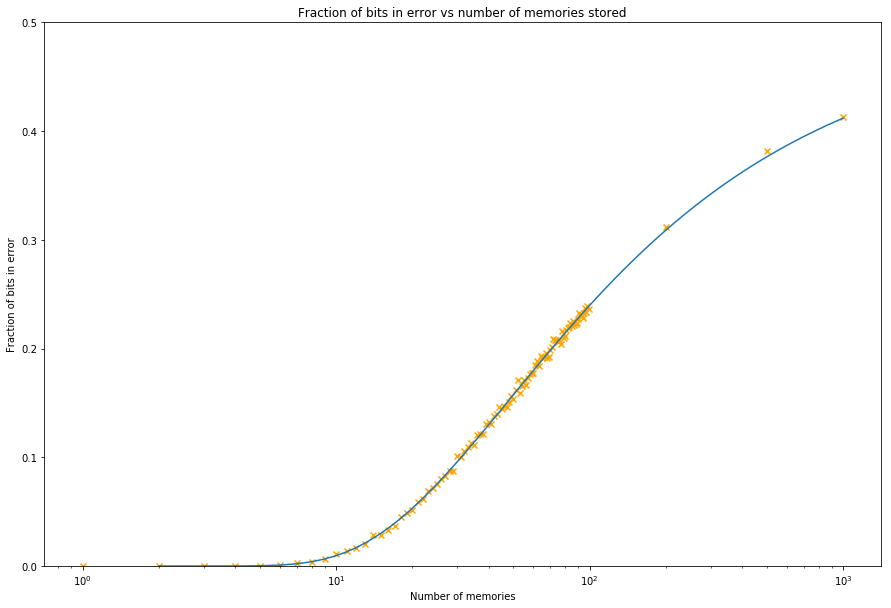

In [10]:
plt.scatter(Ms, p_errs, color="orange", marker="x")
plt.plot(np.arange(0,1000, 1), log_bad_bit_prob(100, np.arange(0,1000, 1)))
plt.ylim(0,0.5)
plt.xscale('log')
plt.title("Fraction of bits in error vs number of memories stored")
plt.xlabel("Number of memories")
plt.ylabel("Fraction of bits in error")

Next, we considered the recall ability of the network when starting from a noisy version of each memory. 

This time, after storing the memories $X$, we created a noisy version $Y$ of the memory matrix by flipping each coefficient of $X$ with probability $p_{noise}$. 

Note this means that with probability $p_{noise}$ we change $1$ to $0$ and vice versa, NOT that with probability $p_{noise}$ we set the coefficient to a random bit.

We then computed for each bit in each noisy memory, whether it would be the same as the bit in the original memory after being updated. That is, we found $Y' = WY$ and found the number of coefficients that differed between $Y'$ and $X$. 

Below we plot the fraction of bits in error against the number of stored memories, for several values of $p_{noise}$. 

In the previous exercise we used the fact that each memory is a 'pseudo fixed point'. That is, we could analytically compute the probability of any bit in a memory remaining the same **if the network is initialized with the memory**. This exercise produces different results because we are not initializing the network with the memory, but a noisy version of it.

We can show mathematically what happens to the distribution of $H_k$ in this new situation:

* Recall that we make a Gaussian approximation and consider $\mathbb{E}H_k$. 
* On page 11 'Capacity Calculations' in the notes we show that, in the situation with no noise $\mathbb{E}H_k=\left(r_k^{(\mu)}-\frac{1}{2}\right)\mathbb{E}K_+$, where $K_+ = \sum_{j\neq k} r_k^{(\mu)}\left(r_k^{(\mu)}-\frac{1}{2}\right)$
* In the new situation, the derivation of the mean remains the same, except that $K_+ = \sum_{j\neq k} \tilde{r}_k^{(\mu)}\left(r_k^{(\mu)}-\frac{1}{2}\right)$, where $\tilde{r}_k^{(\mu)}$ is the random variable that is the 'possibly-flipped' version of $r_k^{(\mu)}$. This was checked thoroughly, we but leave the full derivation out for brevity.

* Writing out the random variables which we are taking the expectation over (including $f_1,...f_N$ which we define as the Bernoulli random variables that indicate whether we flip bits $1,...,N$ or not), we then have:
$$\mathbb{E}_{r_1^{(\mu)},...,r_N^{(\mu)}, f_1,...,f_N}K_+ = (N-1)\mathbb{E}_{r_j^{(\mu)}}\mathbb{E}_{f_j}\left[\tilde{r}_j^{(\mu)}\left(r_j^{(\mu)}-\frac{1}{2}\right)\Bigg|\space r_j^{(\mu)}\right] $$
$$=(N-1)\mathbb{E}_{r_j^{(\mu)}}\mathbb{E}_{f_j}\left[\tilde{r}_j^{(\mu)}r_j^{(\mu)}-\frac{1}{2}\tilde{r}_j^{(\mu)}\Bigg|\space r_j^{(\mu)}\right] $$

$$=(N-1)\mathbb{E}_{r_j^{(\mu)}}\left[p_{noise}\left(1-r_j^{(\mu)}\right)r_j^{(\mu)}+(1-p_{noise})\left(r_j^{(\mu)}\right)^2 - \frac{1}{2}r_j^{(\mu)} \right] $$ 
(where we have used the fact that the expected value of $\tilde{r}_j^{(\mu)}$ is the same as that of $r_j^{(\mu)}$)

$$=(N-1)\left(p_{noise}\cdot 0 +(1-p_{noise})\cdot \frac{1}{2} -\frac{1}{4}\right) $$
(since $\left(1-r_j^{(\mu)}\right)r_j^{(\mu)}=0$ regardless of the value of $r_j^{(\mu)}$).

$$=(N-1)\left(\frac{1}{4}-\frac{1}{2}p_{noise}\right)$$

* So $$\mathbb{E}H_k = \left(r_k^{(\mu)}-\frac{1}{2}\right)(N-1) \left(\frac{1}{4}-\frac{1}{2}p_{noise}\right)=\pm \frac{N-1}{8}(1-2p_{noise})$$

* The variance of $H_k$ remains the same even with the noise (this can be shown, but the intuition is that the variance of a Bernoulli random variable with parameter $\frac{1}{2}$ is not increased by flipping it with probability $p_{noise}$, regardless of the value of $p_{noise}$). 

In particular, notice that when $p_{noise}=0$, we recover the situation without noise.

This explains the behaviour of the graphs where $p_{noise}>0.5$. The graph with flipping probability $p_{noise}$ is the reflection of the graph with flipping probability $1-p_{noise}$. This is because if we exchange $p_{noise}$ for $1-p_{noise}$, we simply change the sign of the expected value!   

To verify these claims, we also plot the theoretical probability of error in each bit for different values of $p_{noise}$:

They are in close agreement with the experimental results.

In [14]:
N=100
noise_levels = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 1.]
all_p_errs = []
for noise_level in noise_levels:
    p_errs = []
    for M in Ms:
        p_errs_given_M = []
        for repeat in range(max(1,int(1000./M))):
            memories = np.random.binomial(1, 0.5, (M, N))
            W = get_W(memories)
            
            flips = np.random.binomial(1, noise_level, (M, N))
            #noise = np.random.binomial(1, 0.5, (M, N))
            noisy_mems = memories * (1-flips) + (1-memories) * flips #1-memories or 1-noise?
            
            evolved = np.matmul(W, noisy_mems.T).T>0
            errs = memories != evolved
            n_errs = np.sum(errs, (0,1))
            p_err = n_errs / (M*N)
            p_errs_given_M.append(p_err)
            
        p_errs.append(np.mean(p_errs_given_M))
#     print("Ms = {}".format([int(10**log10M) for log10M in log10Ms]))
#     print("err probs = {}".format(p_errs))
    all_p_errs.append(p_errs)


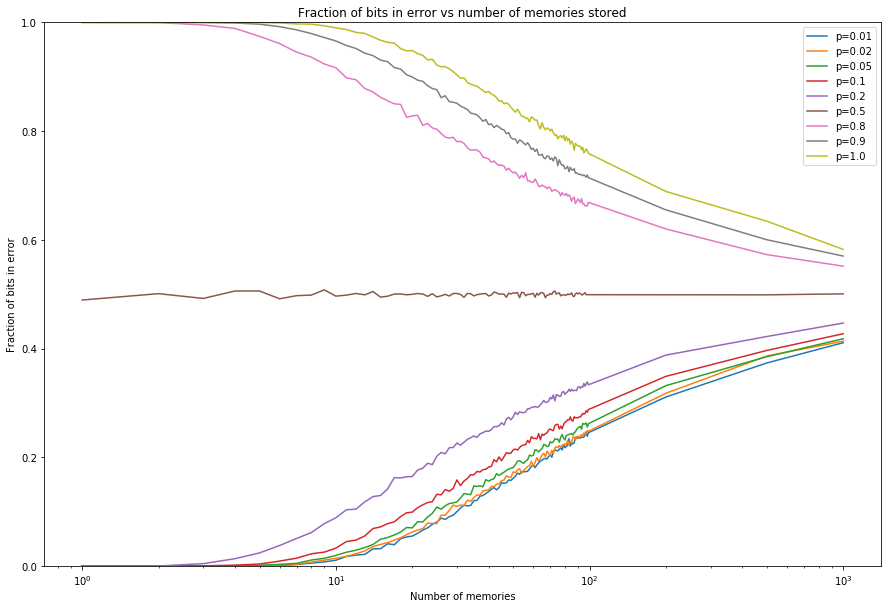

In [15]:
for pe in all_p_errs:
    plt.plot(Ms, pe)
plt.ylim(0,1.)
plt.xscale('log')
plt.title("Fraction of bits in error vs number of memories stored")
plt.xlabel("Number of memories")
plt.ylabel("Fraction of bits in error")
plt.legend(["p={}".format(nl) for nl in noise_levels])


In [16]:
def bbpn(N,  M, nl):
    # Gives the average error probability over randomness in chosen index and in patterns stored.
    # this IS NOT the same as prob of at least 1 error in any pattern over randomness in patterns stored.
    # it IS the same as error prob of at least 1 error in a chosen pattern over randomness in patterns stored.
    mean = ((N-1)/8.)*(1.-2*nl)
    std = np.sqrt((M-1)*(N-1) / 32)
     
    return norm.cdf(0, loc=mean, scale = std)

/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/home/peter/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1735: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/peter/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1736: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
/home/peter/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/peter/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/peter/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1737: RuntimeWarning: invalid value

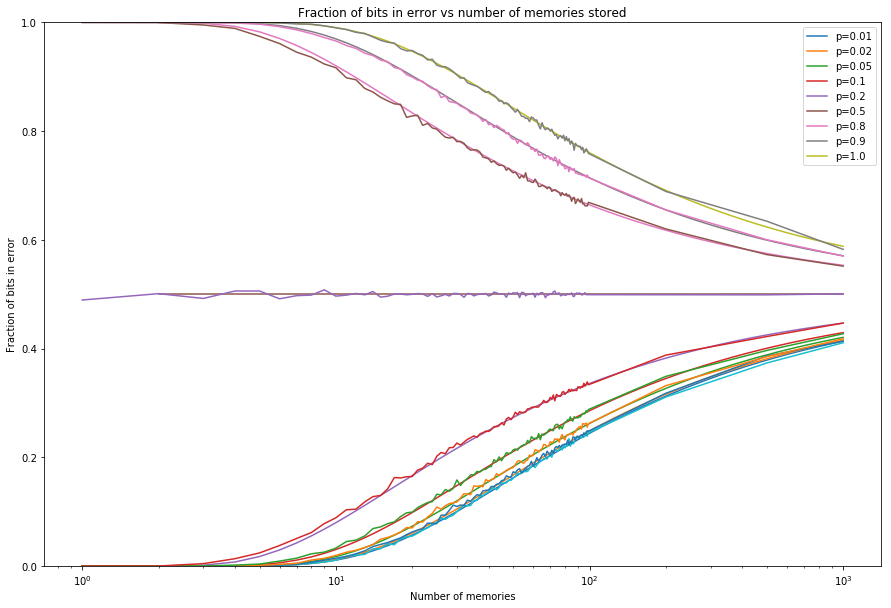

In [20]:
for nl in noise_levels:
    plt.plot(np.arange(0,1000, 1), bbpn(100, np.arange(0,1000, 1), nl))
for pe in all_p_errs:
    plt.plot(Ms, pe)
plt.ylim(0,1.)
plt.xscale('log')
plt.title("Fraction of bits in error vs number of memories stored")
plt.xlabel("Number of memories")
plt.ylabel("Fraction of bits in error")
plt.legend(["p={}".format(nl) for nl in noise_levels])